# Time Series
## 시계열
p393

## 예제: delivery
1. 일자별 총 통화건수와 전일대비 증가량을 구하여라
2. 요일별로 각 업종별 통화건수를 확인하고 막대그래프로 표현하여라
3. 평일과 주말(금,토,일)로 그룹을 나누어서 각 그룹별 시군구별 통화건수를 분석하여라
4. 시간대별로 가장 인기있는 음식업종을 출력하여라
5. 그룹을 전달하면 그룹내 통화건수가 가장 많은 상위 n개의 row가 출력되도록 사용자 정의 함수를 만들고 적용시켜보자

In [1]:
import pandas as pd
from dateutil.parser import parse

In [2]:
xlsx1= pd.ExcelFile('data/delivery_02.xlsx')
deliv2= xlsx1.parse(xlsx1.sheet_names[0], parse_dates=['일자'])
# deliv2

##### 2번_요일 칼럼을 만들자

In [3]:
deliv2['요일']= deliv2['일자'].dt.dayofweek
deliv2= deliv2.set_index('일자')

In [4]:
deliv2[deliv2.index=='2018-02-05'].head(1)

,시간대,업종,시도,시군구,읍면동,통화건수,요일
일자,,,,,,,
2018-02-05,0,음식점-족발/보쌈전문,서울특별시,강남구,삼성동,5,0


#### 요일 0~6: 월~일
1. 2-05: 월요일
2. 월요일: 0

In [5]:
dow= [i for i in range(7)]; print(dow)
dow_str= ['MON','TUE','WED','THU','FRI','SAT','SUN']; print(dow_str)
dic_dow= dict(zip(dow, dow_str)); dic_dow
deliv2['요일str']= deliv2['요일'].map(dic_dow)

[0, 1, 2, 3, 4, 5, 6]
['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']


#### 3번_주중주말 칼럼을 만들자

In [6]:
deliv2.loc[deliv2["요일"]>=4,"주중주말"]= "주말"
deliv2.loc[deliv2["요일"]< 4,"주중주말"]= "주중"

In [7]:
print(deliv2[deliv2['주중주말']=='주중'].shape)
print(deliv2[deliv2['주중주말']=='주말'].shape)

(67178, 9)
(52011, 9)


,parse_dates=['일자'] 없이 그냥 데려왔을 때
#### 날짜형식으로 바꾸기
1. pd.to_datetime(deliv['일자'], format='%Y%m%d')
2. deliv.일자= deliv.일자.apply(str).apply(parse)

### 1
일자별 총 통화건수와 전일대비 증가량!
- 데이터 전체: 1달
- resample에 인자 다 때려넣는 방식은 is deprecated

##### 일자별 총

In [8]:
deliv_D_call= deliv2[['통화건수']].resample('D').apply(sum)
deliv_D_call

,통화건수
일자,
2018-02-01,39653
2018-02-02,46081
2018-02-03,54124
2018-02-04,50323
2018-02-05,35023
2018-02-06,38628
2018-02-07,39371
2018-02-08,40153
2018-02-09,49116


##### 전일대비 증가량

In [9]:
deliv_D_call-deliv_D_call.shift(1)

,통화건수
일자,
2018-02-01,NaN
2018-02-02,6428.0
2018-02-03,8043.0
2018-02-04,-3801.0
2018-02-05,-15300.0
2018-02-06,3605.0
2018-02-07,743.0
2018-02-08,782.0
2018-02-09,8963.0


### 2
- 요일별로 각 업종별 통화건수를 확인
- 막대그래프로 표현하여라

In [10]:
deliv2[['업종','통화건수']].resample('D').agg(sum)

,통화건수
일자,
2018-02-01,39653
2018-02-02,46081
2018-02-03,54124
2018-02-04,50323
2018-02-05,35023
2018-02-06,38628
2018-02-07,39371
2018-02-08,40153
2018-02-09,49116


In [11]:
# deliv2[['업종','통화건수']].resample('W-MON').agg(sum) #업종이 안나오는데다, 요일 하나만 나옴

##### 일단 업종별로 묶자

In [12]:
# 요일이 하나씩만 나옴
# deliv2[['업종','통화건수']].groupby(deliv2['업종']).resample('W-MON').agg(sum)

2_요일별로 각 업종별 통화건수를 확인하고 막대그래프로 표현

In [13]:
deliv2[['요일','업종','통화건수']]#.groupby('업종')

,요일,업종,통화건수
일자,,,
2018-02-01,3,음식점-족발/보쌈전문,5
2018-02-01,3,음식점-족발/보쌈전문,5
2018-02-01,3,음식점-족발/보쌈전문,5
2018-02-01,3,음식점-족발/보쌈전문,5
2018-02-01,3,음식점-족발/보쌈전문,5
2018-02-01,3,음식점-족발/보쌈전문,5
2018-02-01,3,음식점-족발/보쌈전문,5
2018-02-01,3,음식점-족발/보쌈전문,5
2018-02-01,3,음식점-족발/보쌈전문,5


#### 요일 0~6: 월~일

In [14]:
deliv_dow_job= deliv2[['요일str','업종','통화건수']].pivot_table(values='통화건수', index=['업종'], columns='요일str'
                                      ,aggfunc=sum)
deliv_dow_job

요일str,FRI,MON,SAT,SUN,THU,TUE,WED
업종,,,,,,,
음식점-족발/보쌈전문,12811,11285,15424,13788,12123,12440,14320
음식점-중국음식,52633,58788,64889,70507,58258,65071,68307
치킨,72591,51656,85512,79446,57815,58737,69168
피자,24002,20428,30604,32355,22120,22296,24562


In [15]:
import matplotlib.pyplot as plt

In [16]:
# fig.clear('all')
plt.rc('font', family='Malgun Gothic')
fig, axis= plt.subplots(1)
fig.set_size_inches(10,10)

In [17]:
# deliv_dow_job.plot.bar(ax= axis)

In [18]:
deliv_dow_job.plot(kind='bar', ax= axis)

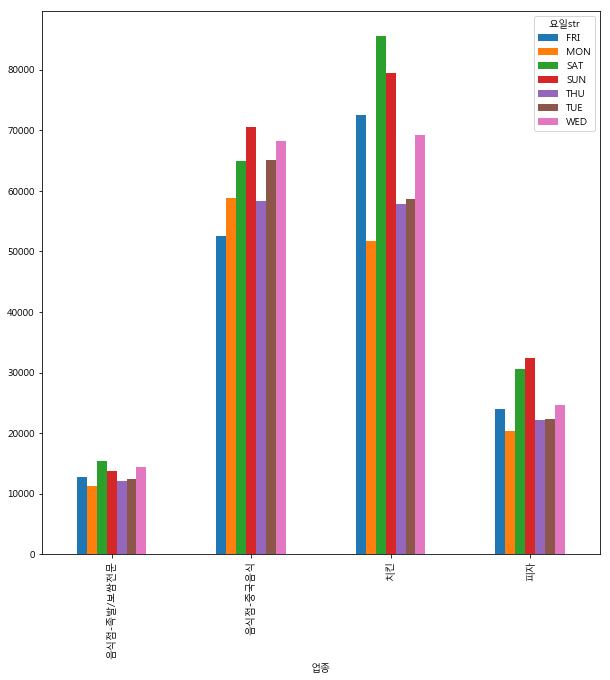

In [19]:
fig

In [20]:
fig.clear('all')
fig, axis= plt.subplots(1)
fig.set_size_inches(10,10)

In [21]:
deliv_dow_job.T.plot(kind='bar', ax= axis)

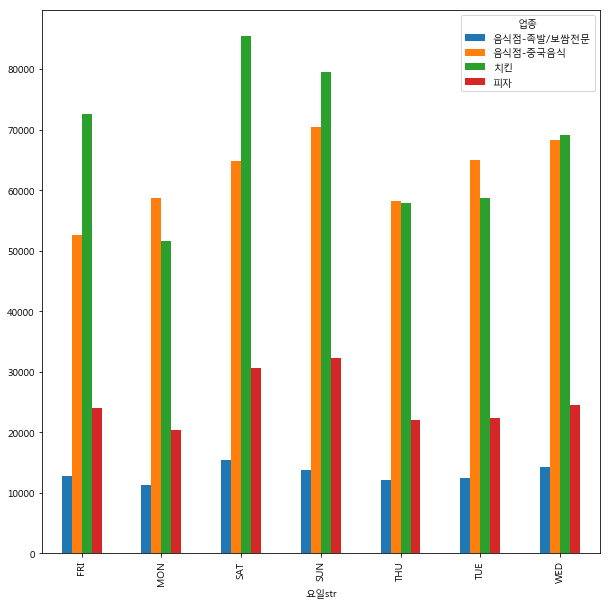

In [22]:
fig

### 3
평일과 주말(금,토,일)로 그룹을 나누어서, 각 그룹별 시군구별 통화건수를 분석

#### 주중주말 칼럼을 만들자

In [23]:
# dic_dow

# dow= [i for i in range(7)]; print(dow)
# dow_str= ['MON','TUE','WED','THU','FRI','SAT','SUN']; print(dow_str)

# deliv2.loc[deliv2["요일"]>=4,"주중주말"]= "주말"
# deliv2.loc[deliv2["요일"]< 4,"주중주말"]= "주중"

# print(deliv2[deliv2['주중주말']=='주중'].shape)
# print(deliv2[deliv2['주중주말']=='주말'].shape)

In [24]:
# deliv2

평일과 주말(금,토,일)로 그룹을 나누어서 각 그룹별 시군구별 통화건수를 분석하여라

In [25]:
deliv2[['주중주말','시군구','통화건수']].pivot_table(values='통화건수', index=['시군구'], columns='주중주말'
                                      ,aggfunc=sum)


주중주말,주말,주중
시군구,,
강남구,41239,53359
강동구,24499,26452
강북구,29225,30065
강서구,50643,52283
관악구,6960,7753
광진구,6750,8034
구로구,15355,16375
금천구,9081,10621
노원구,25250,26365


### 4
시간대별로 가장 인기있는 음식업종을 출력하여라

In [26]:
# deliv2

In [27]:
pd.crosstab(deliv2.업종, deliv2.시간대)#.idxmax()

시간대,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
업종,,,,,,,,,,,,,,,,,,,,,
음식점-족발/보쌈전문,333,194,134,102,59,51,30,27,45,186,...,781,850,1092,1456,1821,1753,1455,1213,978,672
음식점-중국음식,671,638,558,481,421,349,306,320,477,1089,...,2748,2471,2485,2869,3183,2989,2246,1338,897,777
치킨,1714,938,463,233,147,81,52,44,69,141,...,1853,2045,2414,3004,3735,3830,3523,3362,3325,2685
피자,198,93,73,39,41,23,15,17,37,132,...,1640,1715,1841,2123,2591,2546,2242,1985,1600,720


In [28]:
#idxmax: 칼럼별로 최고값을 갖는 인덱스값 반환
pd.crosstab(deliv2.업종, deliv2.시간대).idxmax(0)

시간대
0           치킨
1           치킨
2     음식점-중국음식
3     음식점-중국음식
4     음식점-중국음식
5     음식점-중국음식
6     음식점-중국음식
7     음식점-중국음식
8     음식점-중국음식
9     음식점-중국음식
10    음식점-중국음식
11    음식점-중국음식
12    음식점-중국음식
13    음식점-중국음식
14    음식점-중국음식
15    음식점-중국음식
16    음식점-중국음식
17          치킨
18          치킨
19          치킨
20          치킨
21          치킨
22          치킨
23          치킨
dtype: object

### 5

그룹을 전달하면 
####  그룹내 통화건수가 가장 많은 상위 n개의 row가 출력되도록 
사용자 정의 함수를 만들고 적용

In [29]:
# # dataframe 전달하면
# deliv2.sort_values(by='통화건수', ascending=False).head(10)
# f3= lambda x: x.sort_values(by='통화건수', ascending=False).head(10)
# f3(deliv2)

말고, 꼭 groupby로 풀어야한다

그룹을 전달하면 
####  그룹내 통화건수가 가장 많은 상위 n개의 row가 출력되도록 
사용자 정의 함수를 만들고 적용

In [30]:
# import pandas as pd
# from dateutil.parser import parse
# xlsx1= pd.ExcelFile('data/delivery_02.xlsx')
# deliv2= xlsx1.parse(xlsx1.sheet_names[0], parse_dates=['일자'])
# # deliv2

# deliv2['요일']= deliv2['일자'].dt.dayofweek
# deliv2= deliv2.set_index('일자')

# dow= [i for i in range(7)]; print(dow)
# dow_str= ['MON','TUE','WED','THU','FRI','SAT','SUN']; print(dow_str)
# dic_dow= dict(zip(dow, dow_str)); dic_dow
# deliv2['요일str']= deliv2['요일'].map(dic_dow)

# deliv2.loc[deliv2["요일"]>=4,"주중주말"]= "주말"
# deliv2.loc[deliv2["요일"]< 4,"주중주말"]= "주중"

In [31]:
# deliv2

In [32]:
from pandas import DataFrame

deliv2.groupby(['시군구'])
DataFrame(deliv2.groupby(['시군구']).통화건수.agg(sum).sort_values(ascending=False)[:10])

,통화건수
시군구,
강서구,102926
강남구,94598
동작구,76491
서초구,65928
서대문구,63240
영등포구,61204
송파구,59997
중구,59952
강북구,59290


In [33]:
from pandas import DataFrame

def groupTop10(g):
    return DataFrame((g).통화건수.agg(sum).sort_values(ascending=False)[:10])

In [34]:
groupTop10= lambda g: DataFrame((g).통화건수.agg(sum).sort_values(ascending=False)[:10])

In [35]:
group1= deliv2.groupby(['읍면동'])
groupTop10(group1)

,통화건수
읍면동,
신대방동,60049
송파동,42703
성수동2가,41997
미아동,40759
상계동,38276
길동,34195
신당동,30901
삼성동,30318
화곡동,30048


### 아깐 되었는데 지금은 안 됨 ;;
커널 내렸다가 해도 안 됨

In [36]:
# 아깐 되었는데, 지금은 안 됨;
# from pandas import DataFrame

# def groupTop10(*g):
#     return (*g).통화건수.agg(sum).sort_values(ascending=False)[:10]

# group1= deliv2.groupby(['시군구','읍면동'])
# groupTop10(group1)

#여기서 시군구는 각 읍면동과 같은 행에 있어서 딸려나오는 것뿐
#신대방동 통화건수 합= 60049
#강서구 통화건수 합= 102926

In [38]:
# !jupyter nbconvert --to script ch10_Time_Example_delivery_canRun.ipynb

[NbConvertApp] Converting notebook ch10_Time_Example_delivery_canRun.ipynb to script
[NbConvertApp] Writing 5455 bytes to ch10_Time_Example_delivery_canRun.py
